# Assignment #7

This assignment can be completed by adding code to this notebook for each question.

Turn in a completed script, renamed as

`assignment7_<username>.py`

with your `<username>` being your DataVU login name (e.g., mine is `kgoebber`) to `/archive/courses/met330/assignment7` via the Linux computing system.

**DUE DATE: 10 November 2022 at 10:30 am.**

Prior to turning in your script, please cleanup and comment your code for each problem. Be sure that your output is self-describing.

**Background**

Soundings and the parameters that can be calculated from them are
essential tools that meteorologists use on a daily basis. While it is
relatively easy to calculate some of these parameters by hand, it is
helpful to have predefined functions that can make easy work of doing
these calculations for any number of soundings. Additionally, it is
useful to automate the plotting of temperature, dewpoint, and wind speed
and direction on a skew-T diagram, so that a high-quality visualization
can be produced quickly and on-demand. This assignment will slowly build
a single program to calculate a number of variables and produce
high-quality output to an end user.

Commandline Input Example:
```
>>> Input Location: SGF
>>> Input Date/Time (YYYYMMDDHH): 2004061212
```
Text Output From Program:
```
SGF Observations at 12Z 12 Jun 2004
---------------------------------------------------
 PRES    TEMP  DWPT  RELH   MIXR  DRCT  SKNT  THTA
 hPa      C     C     %     g/kg  deg   knot   K
---------------------------------------------------
986.0   22.4   21.2  92.9  16.60  200     5   298.3
948.0   23.6   21.1  85.9  16.85  229    23   301.3

.
.
.
.
.
.

  4.8  -23.3  -57.3   2.8   3.46   63    35  1148.1
  4.7  -24.0  -57.6   2.9   3.41   59    35  1151.8

Station Information and sounding indices

Station identifier: SGF
Observation time: 040612/1200
Lifted Index: -5.77 C
Total Totals Index: 54.2
SBCAPE: 1883.7 J/kg
SBCIN: -87.1 J/kg
LCL: 951 hPa
LFC: 801 hPa
EL: 207 hPa

WARNING: SEVERE THUNDERSTORMS ARE POSSIBLE!

>>>
```

In [69]:
# add all imports needed to this cell
from datetime import datetime

import matplotlib.pyplot as plt
import metpy.calc as mpcalc
from metpy.plots import Hodograph, SkewT
from metpy.units import pandas_dataframe_to_unit_arrays, units
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import numpy as np
from siphon.simplewebservice.wyoming import WyomingUpperAir

## Question #1

Write a Python program that reads (5 points) in a sounding data file from the
Wyoming sounding archive and print the raw data to standard output.
The program input should be the sounding location (three-letter
identifier) and date/time in YYYYMMDDHH.

Program Name: **soundings.py**

Program Input: Sounding Location and Date/Time

Program Output: Sounding Text File **(\<station
ID\>\_YYYYMMDD\_HH.txt**) and Skew-T Image **(\<station
ID\>\_YYYYMMDD\_HH.png**)

Test Sounding Location: SGF

Test Sounding Date/Time: 2004061212

In [2]:
date = datetime(2004, 6, 12, 12)
station = 'SGF'

df = WyomingUpperAir.request_data(date, station)

/Users/kgoebber/miniconda3/envs/main/lib/python3.10/site-packages/siphon/simplewebservice/wyoming.py:108: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.units = {'pressure': 'hPa',


In [ ]:
datetime.strptime(

## Question #2
Calculate (5 points) the following variables for each level in the sounding and
create well formatted output saved to a file (10 points) similar in style to that of the Wyoming
site including all appropriate variables:

- Potential Temperature
- Mixing Ratio
- Relative Humidity
- Wind Speed
- Wind Direction

> Note: Utilize your resources well. These can all be calculated easily
> using the MetPy module.

In [34]:
data = pandas_dataframe_to_unit_arrays(df)

p = data['pressure']
ip100 = p >= 100 * units.hPa

p = p[ip100]
T = data['temperature'][ip100]
Td = data['dewpoint'][ip100]
uwnd = data['u_wind'][ip100]
vwnd = data['v_wind'][ip100]
height = data['height'][ip100]

theta = mpcalc.potential_temperature(p, T)
relh = mpcalc.relative_humidity_from_dewpoint(T, Td)
mixing_ratio = mpcalc.mixing_ratio_from_relative_humidity(p, T, relh)
wind_speed = mpcalc.wind_speed(uwnd, vwnd)
wind_direction = mpcalc.wind_direction(uwnd, vwnd)

print(f'K{station} Observations at {date:%HZ %d %B %Y}')
print('-------------------------------------------------')
print('  PRES  TEMP  DWPT  RELH   MIXR  DRCT  SKNT  THTA ')
print('  hPa    C     C     %     g/kg   deg  knot   K   ')
print('-------------------------------------------------')
for i in np.arange(p.shape[0]):
    print(f'{p[i].m:6.1f} {T[i].m:5.1f} {Td[i].m:5.1f} {relh[i].to("percent").m:5.1f} '
          f'{mixing_ratio[i].to("g/kg").m:6.1f} {wind_direction[i].m:5.0f}'
          f'{wind_speed[i].m:5.0f} {theta[i].m:6.1f}')

KSGF Observations at 12Z 12 June 2004
-------------------------------------------------
  PRES  TEMP  DWPT  RELH   MIXR  DRCT  SKNT  THTA 
  hPa    C     C     %     g/kg   deg  knot   K   
-------------------------------------------------
 968.0  22.4  21.2  92.9   16.6   200    5  298.3
 948.0  23.6  21.1  85.9   16.9   229   23  301.3
 943.9  23.4  20.9  85.9   16.8   235   27  301.5
 925.0  22.4  20.0  86.3   16.2   240   27  302.2
 911.8  21.7  19.4  86.8   15.8   250   25  302.7
 880.2  20.1  17.9  87.2   14.9   255   22  304.1
 850.0  18.4  16.4  88.1   14.0   265   18  305.4
 819.8  16.2  14.4  89.1   12.7   275   16  306.3
 790.9  14.0  12.4  90.1   11.5   280   15  307.1
 763.1  11.8  10.4  91.1   10.5   270   15  307.8
 756.0  11.2   9.9  91.7   10.2   261   14  308.0
 736.0  11.6   4.6  62.1    7.3   235   13  310.8
 735.9  11.6   4.6  62.1    7.3   235   13  310.8
 709.4   9.4   3.1  64.7    6.8   195   15  311.7
 700.0   8.6   2.6  66.0    6.7   195   15  312.0
 692.0   7

## Question #3
Calculate the following levels for a surface-based parcel path and
add to the text output of problem 2 (5 points):
- Lifting Condensation Level
- Level of Free Convection
- Equilibrium Level
- Lifted Index
- Total Totals Index
- SBCAPE
- SBCIN

> Note: Utilize your resources well. These can all be calculated easily using the MetPy module.

In [42]:
lclp, lclT = mpcalc.lcl(p[0], T[0], Td[0])
lfcp, lfcT = mpcalc.lfc(p, T, Td)
elp, elT = mpcalc.el(p, T, Td)
parcel_temperature = mpcalc.parcel_profile(p, T[0], Td[0])
lifted_index = mpcalc.lifted_index(p, T, parcel_temperature)
total_totals = mpcalc.total_totals_index(p, T, Td)
cape, cin = mpcalc.cape_cin(p, T, Td, parcel_temperature)

print('Station information and sounding indicies')
print(f'Station identifier: {station}')
print(f'Observation time: {date:%y$m$d/%H%M}')
print(f'Lifted Index: {lifted_index[0].m:.1f} C')
print(f'Total Totals Index: {total_totals.m:.1f}')
print(f'SBCAPE: {cape.m:.1f} J/kg')
print(f'SBCIN: {cin.m:.1f} J/kg')
print(f'LCL: {lclp.m:.0f} hPa')
print(f'LFC: {lfcp.m:.0f} hPa')
print(f'EL: {elp.m:.0f} hPa')

Station information and sounding indicies
Station identifier: SGF
Observation time: 04$m$d/1200
Lifted Index: -5.8 C
Total Totals Index: 54.2
SBCAPE: 1879.6 J/kg
SBCIN: -87.1 J/kg
LCL: 951 hPa
LFC: 801 hPa
EL: 207 hPa


## Question #4
Plot the sounding on a skew-T using Python and include the
surfaced-based parcel profile (10 points).
- Plot an appropriate title on the skew-T with the station ID, date and time of the launch
- Plot markers and text to identify the location of the LCL, LFC, and EL.
    
> Note: Utilize the temperature and pressure values from finding the levels to help you plot the marker and text in the correct location.
    

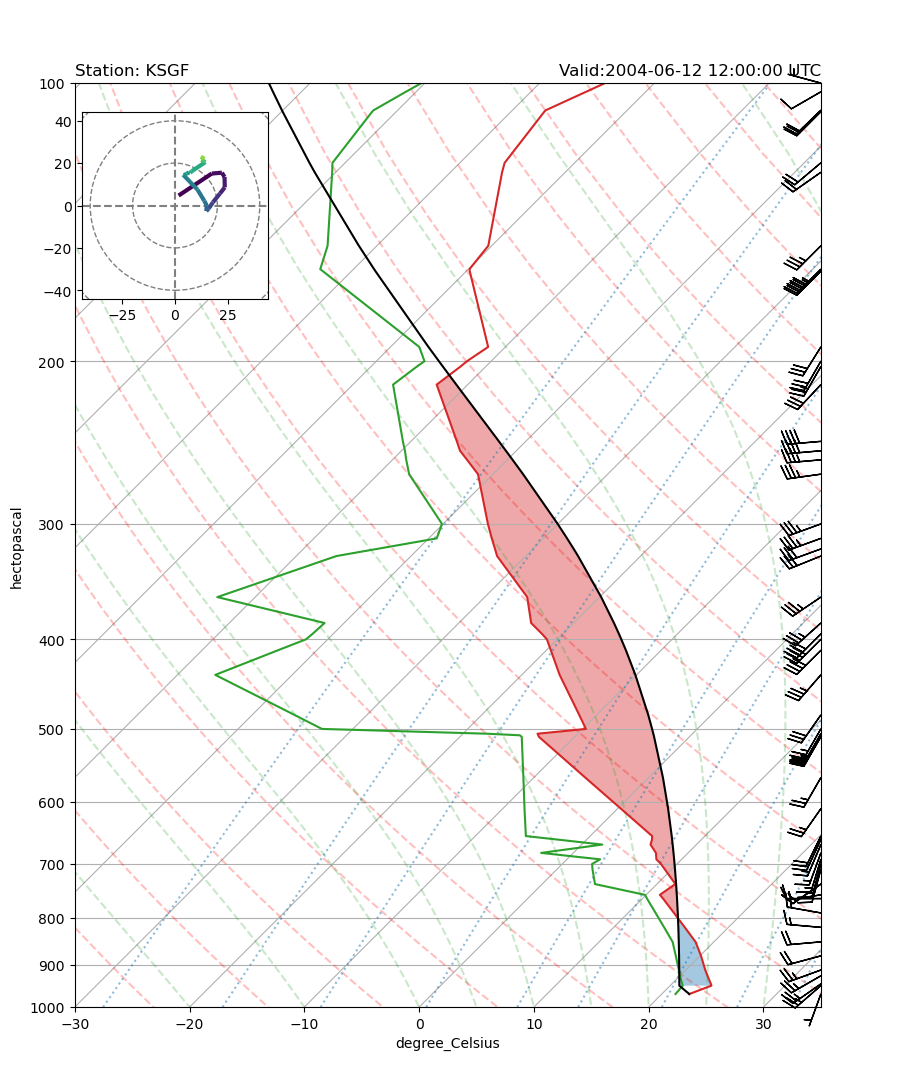

In [76]:
fig = plt.figure(1, figsize=(12, 12))
skew = SkewT(fig, rotation=45)

skew.plot(p, T, 'tab:red')
skew.plot(p, Td, 'tab:green')
skew.plot(p, parcel_temperature, 'black')

skew.plot_barbs(p, uwnd, vwnd)

skew.plot_dry_adiabats(t0=np.arange(220, 530, 10)*units.K, alpha=0.25)
skew.plot_moist_adiabats(colors='tab:green', alpha=0.25)
skew.plot_mixing_lines(pressure=np.arange(1000, 100, -1)*units.hPa,
                       colors='tab:blue', ls='dotted', alpha=0.5)

skew.ax.set_xlim(-30, 35)
skew.ax.set_ylim(1000, 100)

skew.shade_cape(p, T, parcel_temperature)
skew.shade_cin(p, T, parcel_temperature, dewpoint=Td)

# Create a hodograph
ax_hod = inset_axes(skew.ax, '25%', '25%', loc='upper left')
h = Hodograph(ax_hod, component_range=wind_speed.max().m)
h.add_grid(increment=20)
ih6 = height <= 6 * units.km
h.plot_colormapped(uwnd[ih6], vwnd[ih6], height[ih6])

skew.ax.set_title(f'Station: K{station}', loc='left')
skew.ax.set_title(f'Valid:{date} UTC', loc='right')
plt.show()

## Question #5
Shade the CAPE and CIN area on the plot you created in question #4 (5 points).

## Question #6
Plot a hodograph of the lowest 6 km of the atmosphere somewhere on your skew-T diagram that you created in question #4 (5 points).

## Question #7
Have the program assess the likelihood of severe weather happening
as a result of a given sounding. Use the following critical values
for skew-T parameters to have the program make the determination if
severe weather is likely to occur or not. If at least two of the
parameters outlined below are satisfied, then severe weather is more
likely than not to occur if thunderstorms develop issue the
following statement, "WARNING: SEVERE THUNDERSTORMS ARE POSSIBLE!",
otherwise issue the following statement, "NOTE: Severe Thunderstorms
Not Likely To Occur." (5 points)

- CAPE >= 1500 J/kg
- CIN >= -125 J/kg
- LI <= -2 delta_degC

In [78]:
flag = 0
if cape >= 1500 * units('J / kg'): flag += 1
if cin >= -125 * units('J / kg'): flag += 1
if lifted_index <= -2 * units.delta_degC: flag += 1

if flag >= 2:
    print("WARNING: SEVERE THUNDERSTORMS ARE POSSIBLE!")
else:
    print("NOTE: Severe Thunderstorms Not Likely To Occur.")